In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import scipy
from numpy.linalg import inv
from scipy import linalg
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


# Linear System

## Given matrix A and vector b, want to solve x for A x = b

Naively, we could solve x by calculating the inverse of A. 

inv(A) A x = x = inv(A) b

In [2]:
def naive_solve(a,b):
    """
    Solve A x = b
    """
    ainv = inv(a)
    x    = np.dot(ainv,b)
    return x

Let's test this naive solve 

In [3]:
# create a random matrix A
N = 10
a = np.random.rand(N,N)
print(a)

[[7.38710653e-01 4.24418568e-01 6.93463577e-01 1.53693195e-01
  8.95090694e-01 3.17842470e-04 5.79430705e-01 2.07495086e-01
  2.87813101e-01 7.36322948e-01]
 [9.15189271e-01 2.11923368e-01 1.81653476e-01 7.37596331e-01
  9.26862099e-01 2.38800285e-01 9.91900177e-01 8.62363386e-01
  6.47425271e-01 3.25358262e-01]
 [1.93011006e-01 1.00786052e-01 7.49613932e-01 7.15619195e-01
  1.34855325e-01 5.20869498e-01 5.06856376e-01 3.42039378e-01
  8.96030583e-01 7.06031104e-01]
 [3.34039166e-01 7.55074743e-01 4.94170757e-01 2.98636716e-01
  2.35938677e-01 8.22651190e-01 4.43811313e-01 5.95034837e-01
  1.18745586e-01 7.98679412e-01]
 [6.57153021e-01 1.39953269e-01 8.96772813e-01 4.28598730e-01
  6.89160101e-01 9.48439866e-01 5.59537492e-01 5.88043355e-01
  2.02870458e-01 2.98442617e-01]
 [4.51113733e-01 2.07649902e-01 3.08385288e-01 3.32886266e-02
  5.44144146e-01 9.18835952e-01 4.33349532e-01 4.37059826e-02
  4.36875949e-01 9.19488226e-01]
 [7.99644784e-01 8.82784534e-01 6.87217611e-01 8.29745807e

In [4]:
# create a random vector b
b = np.random.rand(N).T

In [5]:
# use the naive_solve
x = naive_solve(a,b)
print(x)

[-1.04440801  2.14479007  1.48900583 -4.26738814  0.27235655  0.47334551
  0.70389997  0.95589192  3.80753195 -2.39898031]


In [6]:
# check the solution by compute the residual
residual = np.matmul(a,x) - b
error = max(abs(residual))
print("The residual is ", error)

The residual is  1.4432899320127035e-15


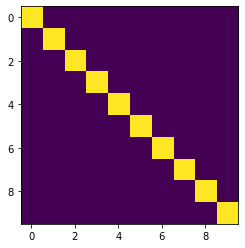

In [7]:
# check ainv
ainv = inv(a)
plt.figure()
plt.imshow(np.matmul(a,ainv))

So far, it's good! We probably don't need to take this course (!?)

### However!

### If we treat scipy/numpy as black boxes, we might make huge mistake without notice.

# BAD example

Consider a matrix

```
A  = [  1       1+c ]   
     [  1-c        1]
     
     
b  = [ 1 + c + c^2,  1].T
     

A x = b has the exact solution



x = [ 1 , c].T
     


```

In [8]:
c = 1.e-7
A = np.array([
            [1,1+c],
            [1-c,1]
            ])

In [9]:
b = np.array([1+c*(1+c),1]).T

In [10]:
# Solve A_star x = B_star
x = np.linalg.solve(A, b)
print("The solution is ", x)

The solution is  [ 1.01041862 -0.01041852]


In [11]:
exact_sol  = np.array([1, c])
rel_error  = abs((x - exact_sol)/exact_sol)
print("Relative Error = ", rel_error)


Relative Error =  [1.04186223e-02 1.04186213e+05]


In [12]:
con = np.linalg.cond(A)
print("The condition number of A is ", con)

The condition number of A is  396185090406815.1


# A poor performance example

In [13]:
N= 3000

if the matrix is symmetry and postive defined

In [14]:
# create a symmmetry and positive defined matrix
a = np.random.rand(N,N)
a_pd = np.matmul(a, a.T)
a_symm = (a_pd + a_pd.T)/2

In [15]:
b = np.random.rand(N)

In [16]:
def naive_solve(a,b):
    ainv = inv(a)
    x    = np.matmul(ainv,b)
    return x

In [17]:
%timeit naive_solve(a_symm,b)

3.25 s ± 26.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## If you have took this course

In [18]:
def cholesky_solve(a,b):
    K = scipy.linalg.cho_factor(a)
    x =linalg.cho_solve(K,b)
    return x

In [19]:
%timeit cholesky_solve(a_symm,b)

678 ms ± 8.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# LU Factorization
In scipy, we have

```
scipy.linalg.lu()
scipy.linalg.lu_factor()
scipy.linalg.lu_solve()
```

In [ ]:
a = np.array([[1,2,2],[4,6,8],[4,8,10]])
b = np.array([4,6,10]).T

In [ ]:
print(a)

In [ ]:
P, L, U = scipy.linalg.lu(a)

In [ ]:
print(P)
print(L)
print(U)

In [ ]:
# check A = PLU
residual = np.matmul(P,np.matmul(L,U)) - a

In [ ]:
print(residual)

## Another way,

In [ ]:
lu, piv = scipy.linalg.lu_factor(a)

lu : Matrix containing U in its upper triangle, and L in its lower triangle. The unit diagonal elements of L are not stored.

piv: Pivot indices representing the permutation matrix P: row i of matrix was interchanged with row piv[i].

In [ ]:
print(lu)

In [ ]:
x = scipy.linalg.lu_solve((lu,piv), b, trans=0, overwrite_b=False, check_finite=True)

In [ ]:
print(x)

In [ ]:
# check the solution
print(np.matmul(a,x)-b)

In [ ]:
# use two steps to get the solution
def custom_lu(a,b):
    lu, piv = scipy.linalg.lu_factor(a)
    x = scipy.linalg.lu_solve((lu,piv), b, trans=0, overwrite_b=False, check_finite=True)
    return x

In [ ]:
x = custom_lu(a,b)
print("The solution is ", x)

In [ ]:
# we could also use one line solve
x = np.linalg.solve(a,b)
print("The solution is ", x)
x = scipy.linalg.solve(a,b)
print("The solution is ", x)

In [ ]:
print("The solution is ", x)

### Quesiton: Why we seperate the LU solver to two steps (lu_facotr and lu_solve)?¶

In [ ]:
a = np.array([[2,0,-1],[5,1,0],[0,1,3]])

In [ ]:
inv(a)